In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                            summarize, 
                            poly)

In [2]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [3]:
X = MS(["Price", "Urban", "US"]).fit_transform(Carseats)
y = Carseats.Sales
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


Y = 13.04 - 0.0545 * Price - 0.0219 + 1.2001 ==> in urban and in US  
Y = 13.04 - 0.0535 * Price + 1.2001 ==> not in urban but in US  
Y = 13.04 - 0.0535 * Price - 0.0219 ==> not in US but in urban  
Y = 13.04 - 0.0353 * Price ==> neither in urban nor in US  

In [4]:
X = MS(["Price", "US"]).fit_transform(Carseats)
y = Carseats.Sales
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [5]:
anova_lm(results1, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


anova() suggests no significant superior of model2 over model1, and vice versa

In [6]:
results2.conf_int()

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


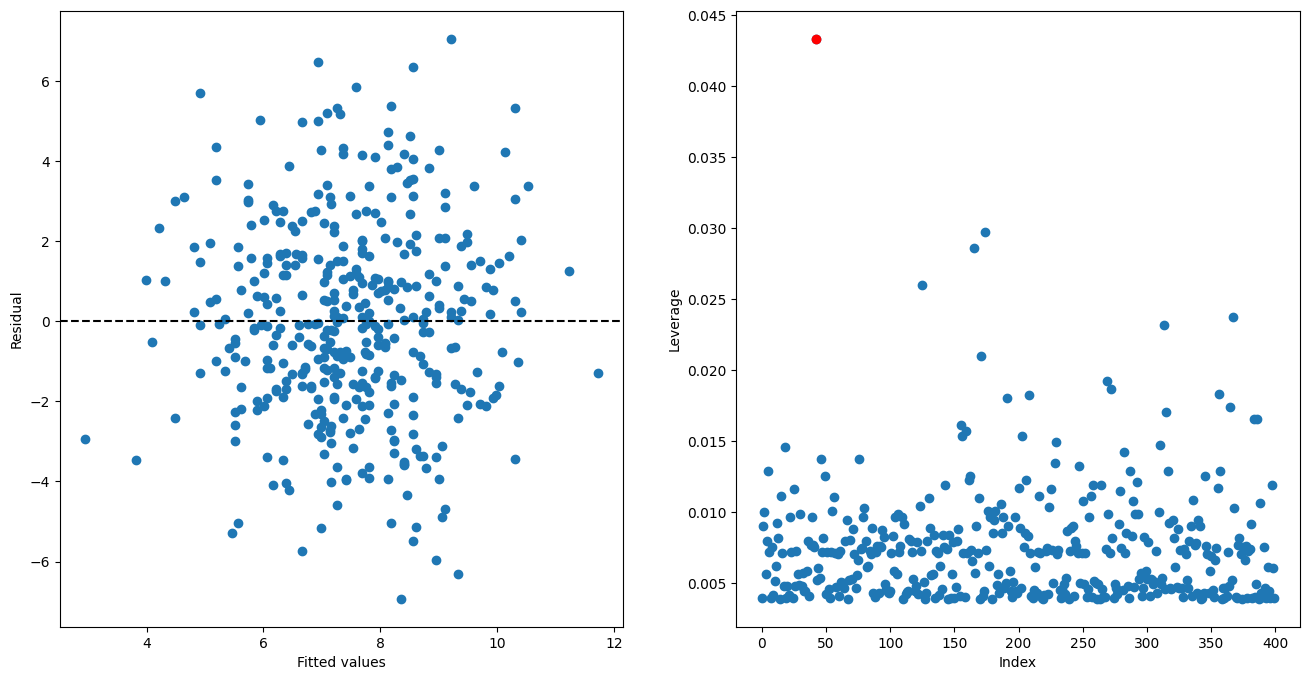

In [7]:
from utils import *
plot_diagnostics(results2)